# Lab 03
## Student Name: Aagnay Kariyal
## Student ID: 8830232
.
.
.
### Data Preprocessing Tasks
***

#### 1) Detecting and Handling Outliers

In [33]:
# Importing all the dependencies
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [34]:
# Inserting the data from the csv into a dataframe
data = pd.read_csv('/Users/aagnaykariyal/Documents/Conestoga/AI Algorithms/Lab 03/creditcard.csv')
data

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

Using the whisker approach

In [35]:
# Creating a function to find if there are any outliers using the box whisker approach.
def clean(var):
    Q1 = data[var].quantile(0.25)
    Q3 = data[var].quantile(0.75)
    IQR = Q3 - Q1
    
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    
    upper_values = np.array(data[var] >= upper)
    lower_values = np.array(data[var] <= lower)
    upper_count = np.prod(upper_values.shape)
    lower_count = np.prod(lower_values.shape)
    result = None
    
    if upper_count & lower_count == 0:
        return f"There are no outliers in the column {var}"
    else:
        upper_values = np.where(data[var] >= upper)[0]
        lower_values = np.where(data[var] <= lower)[0]
        
        data[var] = data[var].drop(index=upper_values, inplace=None)
        data[var] = data[var].drop(index=lower_values, inplace=None)
        return "The column is now cleaned"

In [36]:
col_names = data.columns # Getting all the column names in the dataframe
col_names = col_names.drop('Class') # Dropping class as it only has two values to detect fraudulent data
for names in col_names: # Iterating through all the columns except class to clean the data
    print(names)
    print(clean(names))

Time
The column is now cleaned
V1
The column is now cleaned
V2
The column is now cleaned
V3
The column is now cleaned
V4
The column is now cleaned
V5
The column is now cleaned
V6
The column is now cleaned
V7
The column is now cleaned
V8
The column is now cleaned
V9
The column is now cleaned
V10
The column is now cleaned
V11
The column is now cleaned
V12
The column is now cleaned
V13
The column is now cleaned
V14
The column is now cleaned
V15
The column is now cleaned
V16
The column is now cleaned
V17
The column is now cleaned
V18
The column is now cleaned
V19
The column is now cleaned
V20
The column is now cleaned
V21
The column is now cleaned
V22
The column is now cleaned
V23
The column is now cleaned
V24
The column is now cleaned
V25
The column is now cleaned
V26
The column is now cleaned
V27
The column is now cleaned
V28
The column is now cleaned
Amount
The column is now cleaned


In [37]:
print(data.shape)
data = data.dropna() # Removing all the null values from cleaning the data
print(data.shape)

(284807, 31)
(146334, 31)


### Descriptive Analytical Tasks
***

1) Analyzing the distribution of Fraud and Non-Fraud transactions

In [38]:
data['Class'].unique() # Means it is a Fraud, 0 means it is not
# Converting the numerical values into categorical for easier analysis
counts = data['Class'].value_counts()
print(counts)

Class
0    146319
1        15
Name: count, dtype: int64


From the above data we can see that there are only 15 Fraudulent cases wheras there are 1,46,319 Non-Fraudulent cases

2) Analyzing the correlation between the Class feature and all the other features

In [39]:
c_matrix = data.corr()
c_matrix.head(30)

Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.243302 -0.079032 -0.584282 -0.206164  0.274393 -0.170560   
V1      0.243302  1.000000 -0.607645 -0.653576  0.139793 -0.302659 -0.068908   
V2     -0.079032 -0.607645  1.000000  0.182312  0.280412  0.584172 -0.142545   
V3     -0.584282 -0.653576  0.182312  1.000000  0.039967 -0.269626  0.330173   
V4     -0.206164  0.139793  0.280412  0.039967  1.000000  0.112006  0.184414   
V5      0.274393 -0.302659  0.584172 -0.269626  0.112006  1.000000 -0.128285   
V6     -0.170560 -0.068908 -0.142545  0.330173  0.184414 -0.128285  1.000000   
V7      0.111473 -0.433885  0.769223 -0.086539  0.101914  0.782008 -0.388301   
V8     -0.186010 -0.452119  0.130582  0.417561  0.048369 -0.196368  0.586180   
V9      0.146934  0.288310 -0.073881 -0.122859  0.283920 -0.043302  0.117858   
V10    -0.007882  0.445023 -0.553563 -0.173788 -0.087289 -0.423449  0.083803   
V11    -0.236306  0.019722 -0.010797  0.073995 -0.006415 -0.030536  0.099727   
V12     0.032206  0.069376  0.148319 -0.042362  0.268600  0.119744  0.137279   
V13     0.013180  0.057120  0.019813 -0.009552 -0.072258  0.024709  0.000934   
V14    -0.098426 -0.006022  0.120643 -0.089311  0.120402  0.091022 -0.121111   
V15    -0.266930  0.053819  0.062259  0.111949  0.077587 -0.142691 -0.171105   
V16     0.005020  0.011258  0.026171  0.009006 -0.112167 -0.007170 -0.011445   
V17    -0.102785 -0.020967 -0.056932 -0.031761 -0.008901 -0.165365 -0.061519   
V18     0.123139 -0.044440 -0.009454 -0.025746 -0.015652  0.003321  0.118668   
V19     0.092284  0.037674 -0.023533 -0.131766 -0.119560  0.039804  0.036611   
V20    -0.193463 -0.377559  0.220747  0.303830  0.005787  0.202354  0.040514   
V21     0.072079 -0.085250 -0.042753 -0.007480 -0.011274  0.002381  0.037699   
V22     0.112380 -0.006150 -0.115434 -0.027404 -0.038167 -0.057916  0.083301   
V23     0.239050  0.359266 -0.265716 -0.251142  0.020770 -0.234678 -0.100281   
V24    -0.000278 -0.011529  0.041263  0.099846  0.081798 -0.211187 -0.400347   
V25    -0.326817  0.150539 -0.091146  0.002230  0.190120 -0.031812  0.002433   
V26    -0.055266 -0.006017  0.016220 -0.028376 -0.101336  0.017984 -0.065754   
V27    -0.067510 -0.266911  0.205829  0.260271 -0.044333  0.013467  0.130008   
V28    -0.202418 -0.388033  0.298994  0.342201  0.012608  0.053261  0.022511   
Amount -0.028983  0.007758 -0.391074 -0.002391 -0.044219 -0.264651  0.157488   

              V7        V8        V9  ...       V21       V22       V23  \
Time    0.111473 -0.186010  0.146934  ...  0.072079  0.112380  0.239050   
V1     -0.433885 -0.452119  0.288310  ... -0.085250 -0.006150  0.359266   
V2      0.769223  0.130582 -0.073881  ... -0.042753 -0.115434 -0.265716   
V3     -0.086539  0.417561 -0.122859  ... -0.007480 -0.027404 -0.251142   
V4      0.101914  0.048369  0.283920  ... -0.011274 -0.038167  0.020770   
V5      0.782008 -0.196368 -0.043302  ...  0.002381 -0.057916 -0.234678   
V6     -0.388301  0.586180  0.117858  ...  0.037699  0.083301 -0.100281   
V7      1.000000 -0.334971 -0.120979  ... -0.044497 -0.103827 -0.265414   
V8     -0.334971  1.000000  0.024204  ...  0.079639  0.053019 -0.020607   
V9     -0.120979  0.024204  1.000000  ...  0.017362  0.054594  0.168975   
V10    -0.477550 -0.217438 -0.470600  ... -0.052116  0.048983  0.174983   
V11    -0.055596  0.121963 -0.141010  ...  0.048885 -0.000403  0.069159   
V12     0.088651  0.091836  0.242455  ... -0.019428 -0.021909  0.096152   
V13    -0.009498 -0.211640 -0.146897  ... -0.048742  0.028746  0.002986   
V14     0.178257  0.035194 -0.022434  ...  0.084032 -0.000729 -0.001767   
V15    -0.046796 -0.113585  0.021910  ...  0.051451 -0.011465  0.045359   
V16    -0.113516  0.103067 -0.012713  ...  0.213687  0.038081  0.001661   
V17    -0.130620  0.093612 -0.144079  ... -0.037357  0.014270  0.049259   
V18    -0.092701  0.148402  0.012010  ... -0.009102  0.051939 -0.122062   
V19     0.000852 -0.018928  0.0

In [40]:
highest_values = c_matrix.iloc[-1].sort_values(ascending=False)
features = highest_values.index[1:11]
print(features)

Index(['V4', 'V17', 'V2', 'V5', 'V16', 'V7', 'V18', 'V11', 'V25', 'V3'], dtype='object')


From the above code we can see that V4 has the highest correlation with the Class target variable

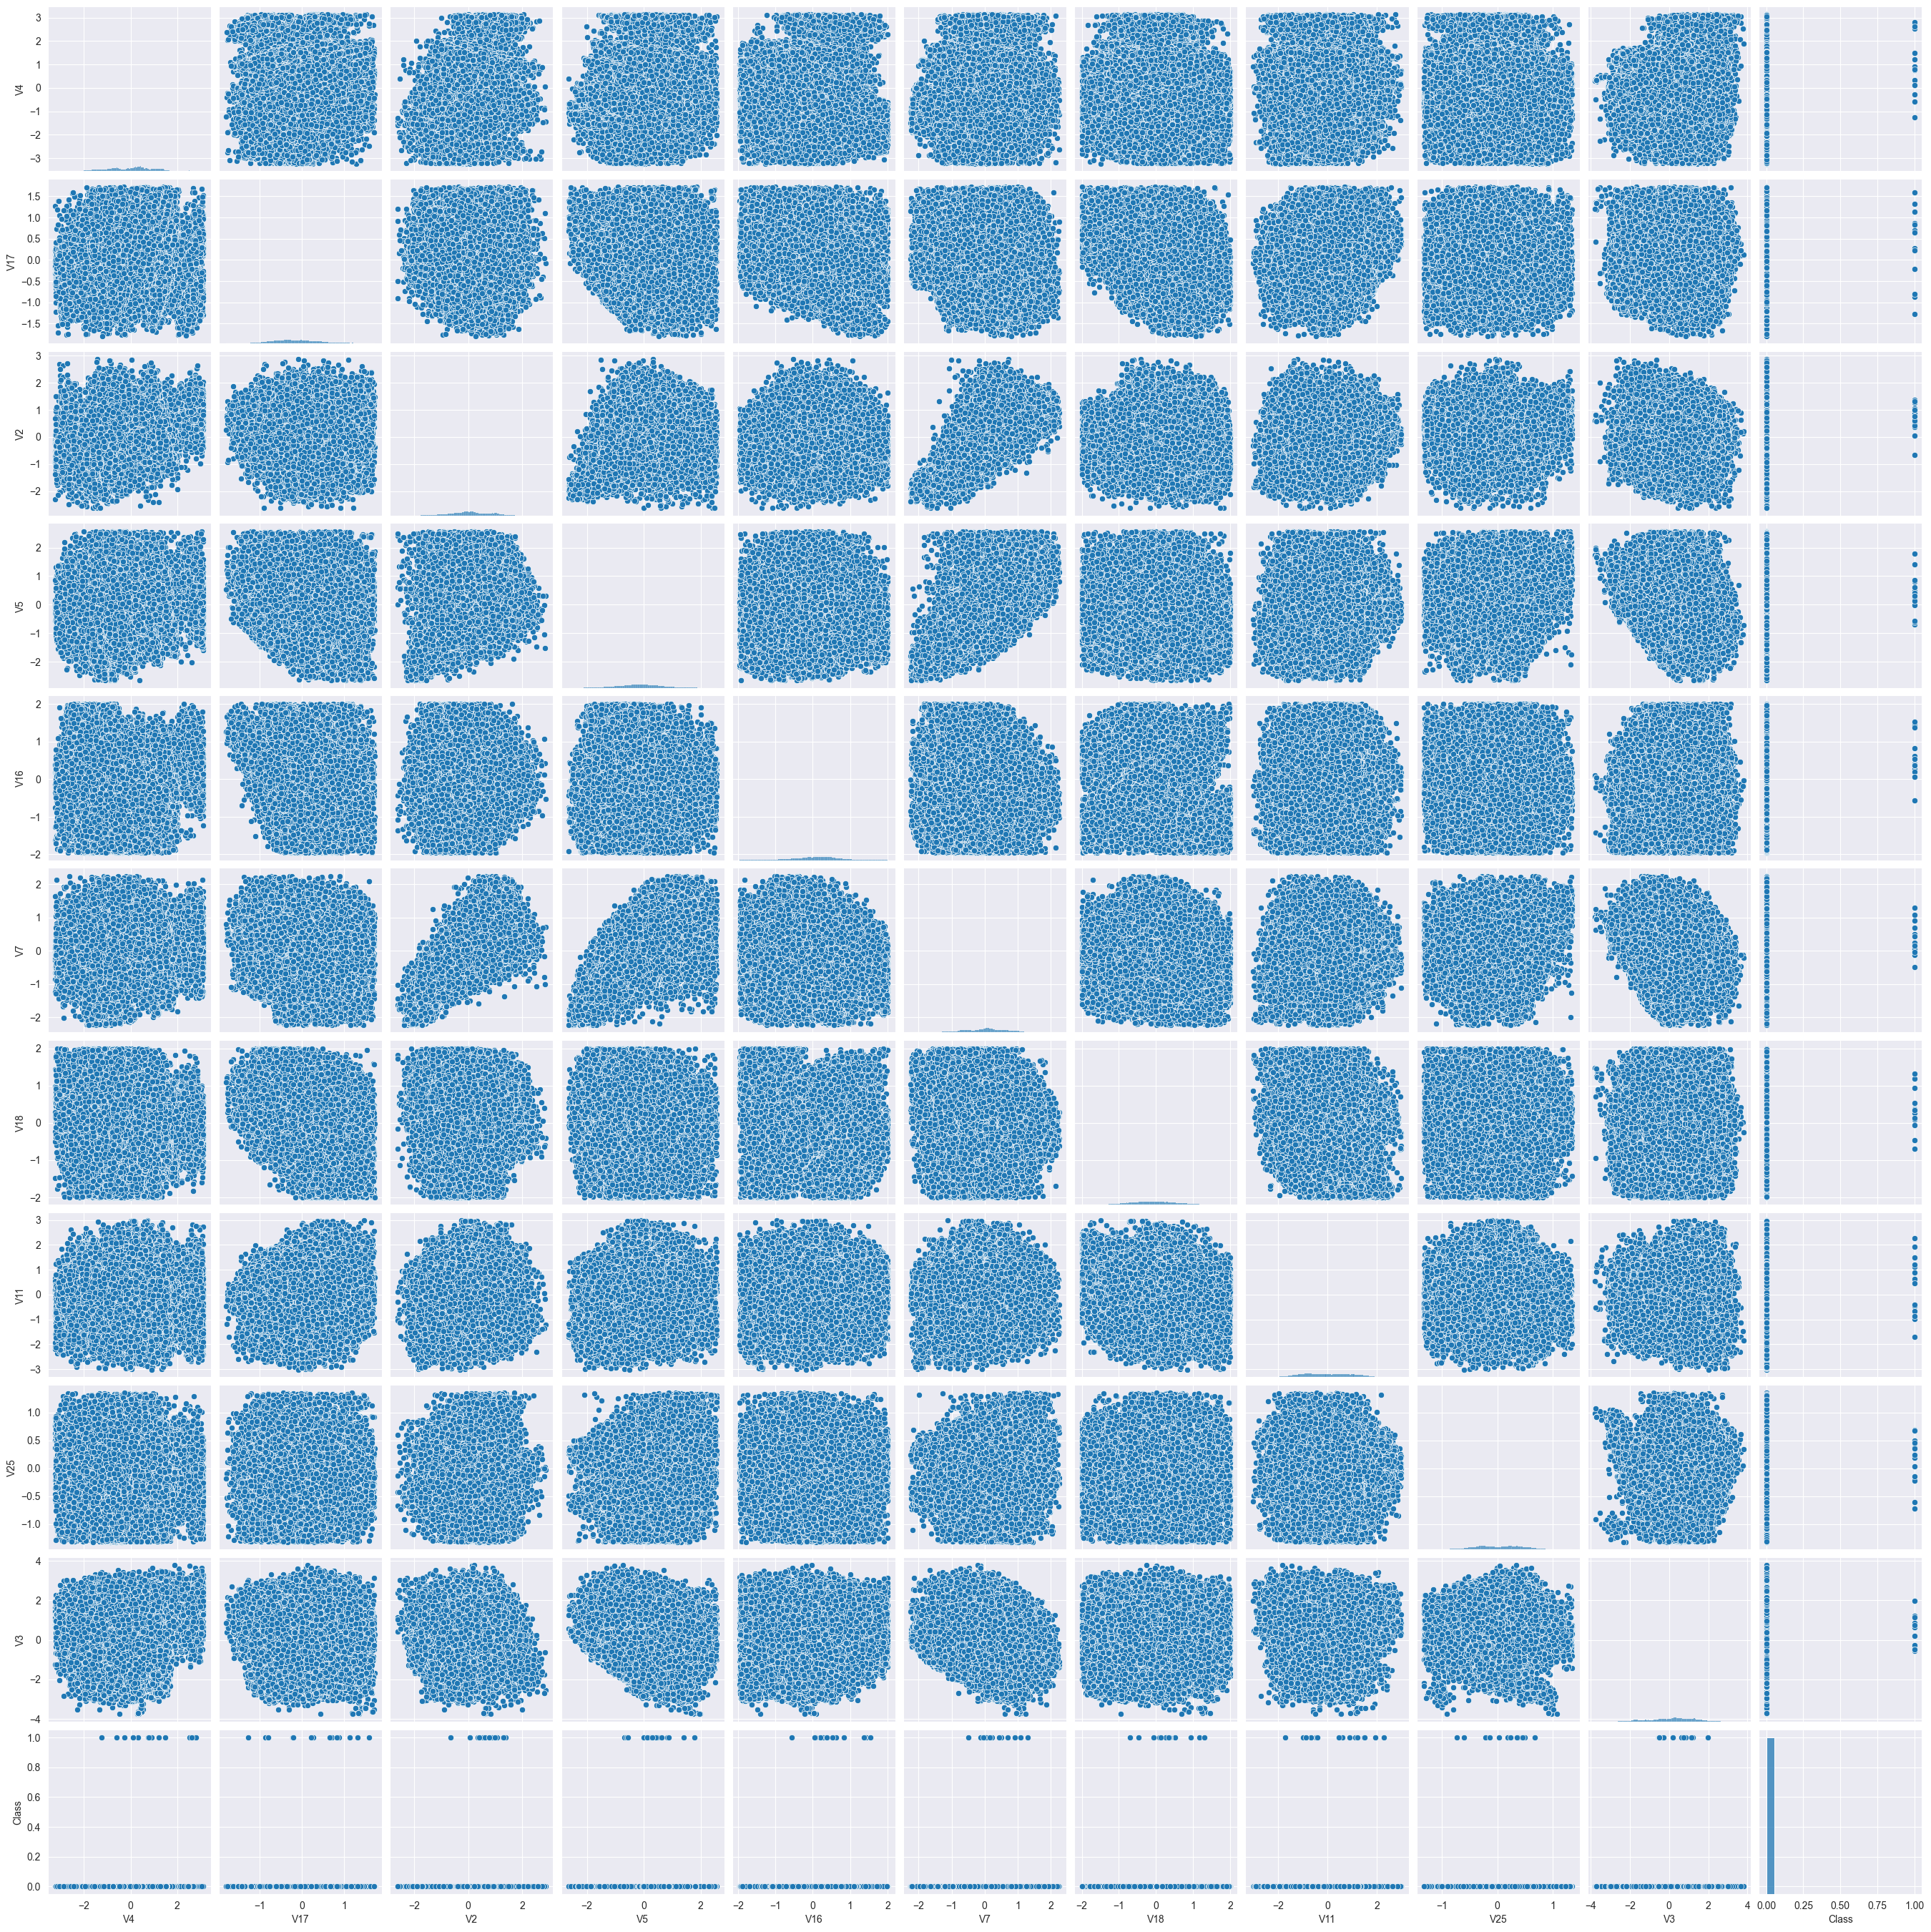

In [41]:
corr_df = pd.DataFrame()

for cols in features:
    temp_df = data[cols]
    corr_df = pd.concat([corr_df, temp_df], axis=1)
    
temp_df = data['Class']
corr_df = pd.concat([corr_df, temp_df], axis=1)
sns.pairplot(corr_df)

The above code is used to choose the 10 features with the highest correlation with the tarrget variable, and plotting their distributions.

### ML Model Training and Testing
***

1) Splitting the cleaned dataset into training and test data

In [42]:
# Splitting the data
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
model = LogisticRegression()

2) Doing a 5-fold cross validation 

In [44]:
scores = cross_val_score(model, X_train, y_train, cv=5)

/Users/aagnaykariyal/Documents/Github/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3) Training the Logistic regression model

In [45]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

4) Printing the coefficients of the model

In [46]:
print(model.coef_)
print('\n\n')
highest_coef = model.coef_.max()
ind = model.coef_[0]
ind = np.where(ind == highest_coef)[0]
print(f'Index {ind}: {col_names[ind][0]}')

[[-6.57658256e-05 -1.16703101e+00 -6.43524652e-01 -2.20152230e+00
   3.91423094e-02  4.23592631e-01  7.93887129e-01  2.71228748e-02
  -1.01643068e-01 -4.37429038e-01  3.50121991e-01 -1.97938753e-01
  -3.05169886e-01 -1.21550905e-01 -5.44924537e-01 -3.91367603e-01
   1.85033458e-01  5.62454114e-01  3.62881263e-01 -4.15527836e-02
   2.27389182e-01  2.39906827e-01  1.95715356e-01  2.42277553e-01
   3.76946804e-01 -6.04572924e-01  1.78265176e-01 -1.96695438e-01
  -4.26767168e-02 -2.92516425e-02]]



Index [6]: V6


From the above output we can see that V6 feature has the highest weight

5) Evaluating the model's performance on the test set using accuracy, precision, recall and f1 scores

In [47]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'{accuracy}')
print(f'{precision}')
print(f'{recall}')
print(f'{f1}')

0.9998633272969556
0.0
0.0
0.0


6) Plotting the ROC curve and printing the AUC

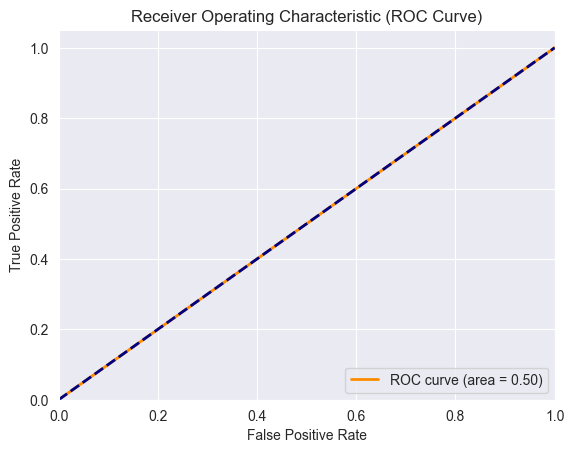

The area under the curve is 0.4999829141607436


In [48]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc="lower right")
plt.show()

roc_auc = auc(fpr, tpr)
print(f'The area under the curve is {roc_auc}')

7) Applying compute_class_weight techniques to handle class imbalance

In [49]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_test), y = y_test)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.5000512575177692, 1: 4877.833333333333}

8) Performing KNN and SVM Classficiation to compare it to the Logistic Regression Baseline

In [50]:
# KNN Classification
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Printing the classification report and confusion matrix
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29264
           1       0.00      0.00      0.00         3

    accuracy                           1.00     29267
   macro avg       0.50      0.50      0.50     29267
weighted avg       1.00      1.00      1.00     29267

KNN Confusion Matrix:
[[29264     0]
 [    3     0]]


/Users/aagnaykariyal/Documents/Github/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aagnaykariyal/Documents/Github/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aagnaykariyal/Documents/Github/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [51]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print(f'Accuracy score of svm is : {svm_acc}')

Accuracy score of svm is : 0.9998974954727167


As we can see, the Accuracy score of SVM, KNN and the Logistic Regression Baseline is extremely similar